(lcsm-bivariate-notebook)=
# Modello LCS bivariato

I modelli LCSM sono stati sviluppati principalmente per studiare le associazioni sequenziali nel tempo tra due o più processi che cambiano nel tempo. In altre parole, le equazioni di cambiamento latente possono essere estese per includere effetti derivanti da variabili aggiuntive per modellare congiuntamente processi multipli di sviluppo in corso (McArdle, 2001; McArdle & Hamagami, 2001). Considereremo qui un modello LCS bivariato con parametri di accoppiamento cambiamento-cambiamento ritardati. Il seguene path diagram è fornito da {cite:t}`wiedemann2022lcsm`.

```{figure} images/lcsm_bivariato.png
---
height: 450px
name: lcsm1-fig
---
**Diagramma di percorso semplificato per un modello LCS bivariato con parametri di accoppiamento  cambiamento-cambiamento ritardati (ad esempio, da dx2 a dy3).** Quadrati bianchi = variabili osservate; cerchi verdi = punteggi veri latenti (prefisso ‘l’); cerchi blu = punteggi di cambiamento latenti (prefisso ‘d’); cerchi gialli = fattori di cambiamento latente costanti. Frecce direzionali = Regressioni; frecce bidirezionali = covarianze. I punteggi unici ($ux_t$ e $uy_t$) e le varianze uniche ($σ^2_{ux}$ e $σ^2_{uy}$) non sono mostrati in questa figura per semplicità.
```

Come in precedenza per il caso del modello univariato, il modello LCSM bivariato include, per ciascuna di due variabili misurate nel tempo, un fattore di cambiamento costante (alpha_constant), un fattore di cambiamento proporzionale (beta) e l’autoregressione dei punteggi di cambiamento (phi). L'aspetto nuovo riguarda i parametri di “accoppiamento”. Per i modelli LCSM bivariati, tali parametri modellano le interazioni tra le variabili $X$ e $Y$. I test su tali parametri consentono di affrontare la seguente domanda della ricerca: le variazioni della variabile Y al momento (t) sono determinate dalle variazioni della variabile X al momento precedente (t-1)? E viceversa.  Oppure tutte e due le condizioni insieme. I test statistici sui parametri di accoppiamento consentono di rispondere alle domande precedenti.

## Illustrazione

Per illustrare l’adattamento e l’interpretazione dei modelli LCS bivariati, analizziamo i dati longitudinali di matematica che sono stati utilizzati nel Capitolo 17 di {cite:p}`grimm2016growth`. I dati longitudinali di matematica sono stati raccolti dall’NLSY-CYA (Center for Human Resource Research, 2009) e i punteggi di matematica provengono dal PIAT (Dunn & Markwardt, 1970). Vengono anche misurati i punteggi di comprensione nella lettura dal secondo all'ottavo grado scolastico. 
Il grado scolastico al momento del test viene utilizzato come metrica temporale e varia dalla seconda elementare (grado 2) alla terza media (grado 8). 

Leggiamo i pacchetti necessari.

In [1]:
source("_common.R")
suppressPackageStartupMessages({
    library("lavaan")
    library("semPlot")
    library("knitr")
    library("markdown")
    library("patchwork")
    library("psych")
    library("DT")
    library("kableExtra")
    library("lme4")
    library("lcsm")
    library("tidyr")
    library("stringr")
})
set.seed(12345)

Importiamo i dati in R utilizzando un file messo a disposizione dagli autori.

In [2]:
nlsy_multi_data <- read.table(file = "data/nlsy_math_hyp_wide_R.dat", na.strings = ".")
names(nlsy_multi_data) <- c(
    "id", "female", "lb_wght", "anti_k1",
    "math2", "math3", "math4", "math5", "math6", "math7", "math8",
    "comp2", "comp3", "comp4", "comp5", "comp6", "comp7", "comp8",
    "rec2", "rec3", "rec4", "rec5", "rec6", "rec7", "rec8",
    "bpi2", "bpi3", "bpi4", "bpi5", "bpi6", "bpi7", "bpi8",
    "asl2", "asl3", "asl4", "asl5", "asl6", "asl7", "asl8",
    "ax2", "ax3", "ax4", "ax5", "ax6", "ax7", "ax8",
    "hds2", "hds3", "hds4", "hds5", "hds6", "hds7", "hds8",
    "hyp2", "hyp3", "hyp4", "hyp5", "hyp6", "hyp7", "hyp8",
    "dpn2", "dpn3", "dpn4", "dpn5", "dpn6", "dpn7", "dpn8",
    "wdn2", "wdn3", "wdn4", "wdn5", "wdn6", "wdn7", "wdn8",
    "age2", "age3", "age4", "age5", "age6", "age7", "age8",
    "men2", "men3", "men4", "men5", "men6", "men7", "men8",
    "spring2", "spring3", "spring4", "spring5", "spring6", "spring7", "spring8",
    "anti2", "anti3", "anti4", "anti5", "anti6", "anti7", "anti8"
)

Definiamo due vettori che serviranno per codificare le variabili `math` e `rec`.

In [3]:
x_var_list <- paste0("math", 2:8)
y_var_list <- paste0("rec", 2:8)

Estraiamo dal DataFrame originale solo le variabili relative alla matematica e alla capacità di lettura, oltre alla variabile `id`.

In [4]:
nlsy_multi_data <- nlsy_multi_data[, c("id", x_var_list, y_var_list)]
glimpse(nlsy_multi_data)

Rows: 933
Columns: 15
$ id    <int> 201, 303, 2702, 4303, 5002, 5005, 5701, 6102, 6801, 6802, 6803, …
$ math2 <int> NA, 26, 56, NA, NA, 35, NA, NA, NA, NA, NA, 35, NA, NA, NA, NA, …
$ math3 <int> 38, NA, NA, 41, NA, NA, 62, NA, 54, 55, 57, NA, 34, NA, 54, 66, …
$ math4 <int> NA, NA, 58, 58, 46, 50, 61, 55, NA, NA, NA, 59, 50, 48, NA, NA, …
$ math5 <int> 55, 33, NA, NA, NA, NA, NA, 67, 62, 66, 70, NA, NA, NA, NA, 65, …
$ math6 <int> NA, NA, NA, NA, 54, 60, NA, NA, NA, NA, NA, NA, NA, NA, 64, NA, …
$ math7 <int> NA, NA, NA, NA, NA, NA, NA, 81, 66, 68, NA, NA, NA, NA, 63, NA, …
$ math8 <int> NA, NA, 80, NA, 66, 59, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ rec2  <int> NA, 26, 33, NA, NA, 47, NA, NA, NA, NA, NA, 33, NA, NA, NA, NA, …
$ rec3  <int> 35, NA, NA, 34, NA, NA, 64, NA, 53, 66, 68, NA, 49, NA, 54, 55, …
$ rec4  <int> NA, NA, 50, 43, 46, 67, 70, 50, NA, NA, NA, 63, 53, 37, NA, NA, …
$ rec5  <int> 52, 35, NA, NA, NA, NA, NA, 69, 76, 66, 70, NA, NA, NA, NA, 78, …
$ rec6  <int> NA, 

Esaminiamo le statistiche descrittive.

In [5]:
psych::describe(nlsy_multi_data)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,933,532334.89711,3.280208e+05,506602.0,520130.77108,391999.4400,201,1256601,1256400,0.28416593,-0.90788724,1.073892e+04
math2,2,335,32.60896,1.028600e+01,32.0,32.27509,10.3782,12,60,48,0.26866808,-0.46001296,5.619840e-01
math3,3,431,39.88399,1.029949e+01,41.0,39.88406,10.3782,13,67,54,-0.05209289,-0.32591683,4.961091e-01
math4,4,378,46.16931,1.016510e+01,46.0,46.22039,8.8956,18,70,52,-0.05957828,-0.07596653,5.228366e-01
math5,5,372,49.77419,9.471909e+00,48.0,49.76510,8.8956,23,71,48,0.04254744,-0.33811258,4.910956e-01
math6,6,390,52.72308,9.915594e+00,50.5,52.38462,9.6369,24,78,54,0.25104168,-0.38086152,5.020956e-01
math7,7,173,55.35260,1.062727e+01,53.0,55.08633,11.8608,31,81,50,0.21484791,-0.97096223,8.079765e-01
math8,8,142,57.83099,1.153101e+01,56.0,57.42982,12.6021,26,81,55,0.15905447,-0.52229674,9.676607e-01
rec2,9,333,34.68168,1.036303e+01,34.0,33.89888,10.3782,15,79,64,0.80847754,1.05831429,5.678904e-01


Esaminiamo le traiettorie di crescita nel campione per la matematica.

Warning message:
“Removed 2787 rows containing missing values (`geom_line()`).”


Warning message:
“Removed 4310 rows containing missing values (`geom_point()`).”


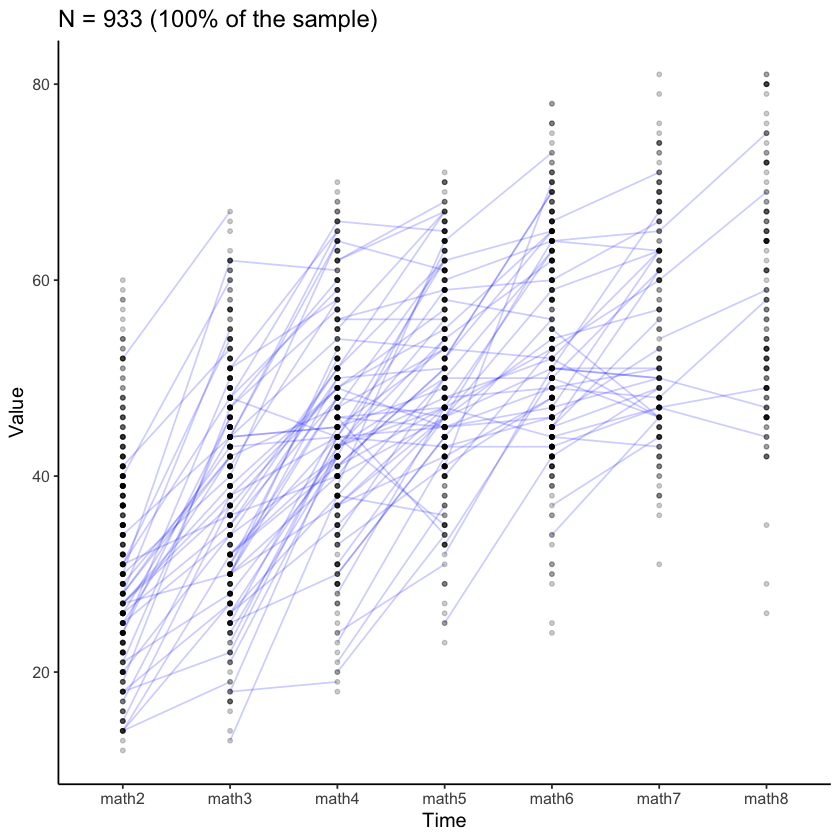

In [6]:
plot_trajectories(
    data = nlsy_multi_data,
    id_var = "id",
    var_list = x_var_list,
    xlab = "Time", ylab = "Value",
    connect_missing = FALSE,
    # random_sample_frac = 0.018,
    title_n = TRUE
)

Esaminiamo i dati di alcuni soggetti presi a caso.

Warning message:
“Removed 40 rows containing missing values (`geom_point()`).”


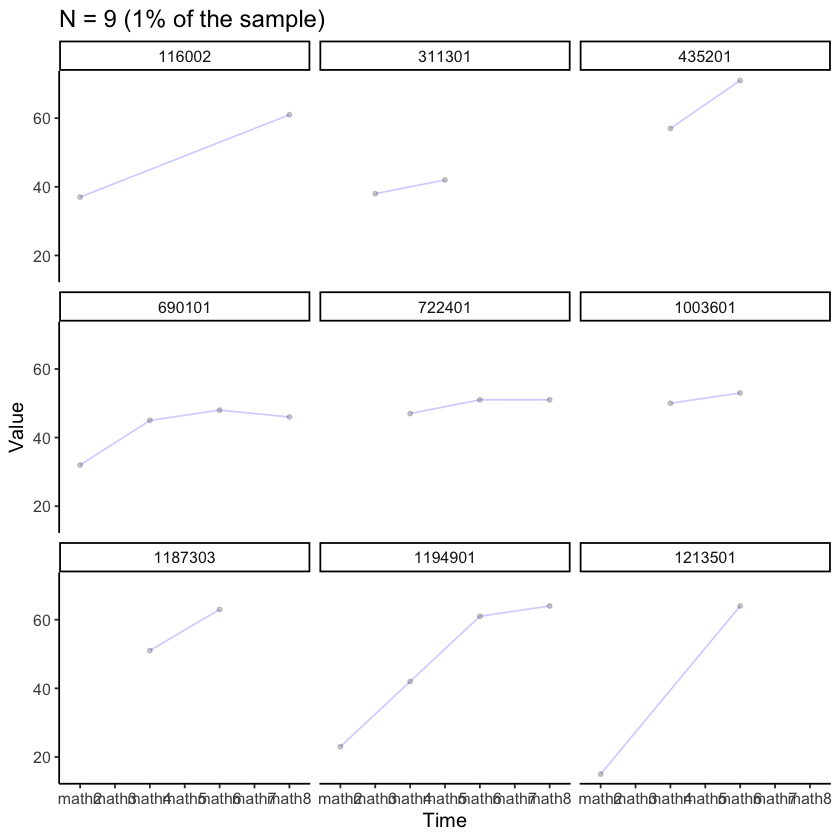

In [7]:
plot_trajectories(
    data = nlsy_multi_data,
    id_var = "id", 
    var_list = x_var_list,
    xlab = "Time", ylab = "Value",
    connect_missing = TRUE, 
    random_sample_frac = 0.01, 
    title_n = TRUE) +
  facet_wrap(~id)

Esaminiamo le curve di crescita per la comprensione nella lettura.

Warning message:
“Removed 2804 rows containing missing values (`geom_line()`).”


Warning message:
“Removed 4317 rows containing missing values (`geom_point()`).”


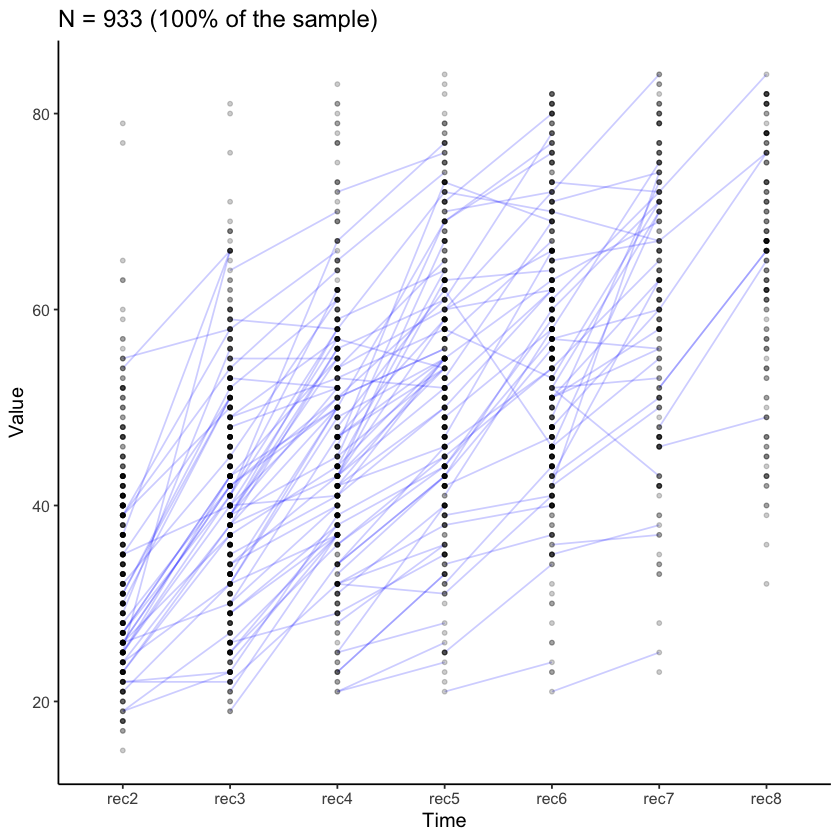

In [8]:
plot_trajectories(
    data = nlsy_multi_data,
    id_var = "id",
    var_list = y_var_list,
    xlab = "Time", ylab = "Value",
    connect_missing = FALSE,
    # random_sample_frac = 0.018,
    title_n = TRUE
)

Warning message:
“Removed 40 rows containing missing values (`geom_point()`).”


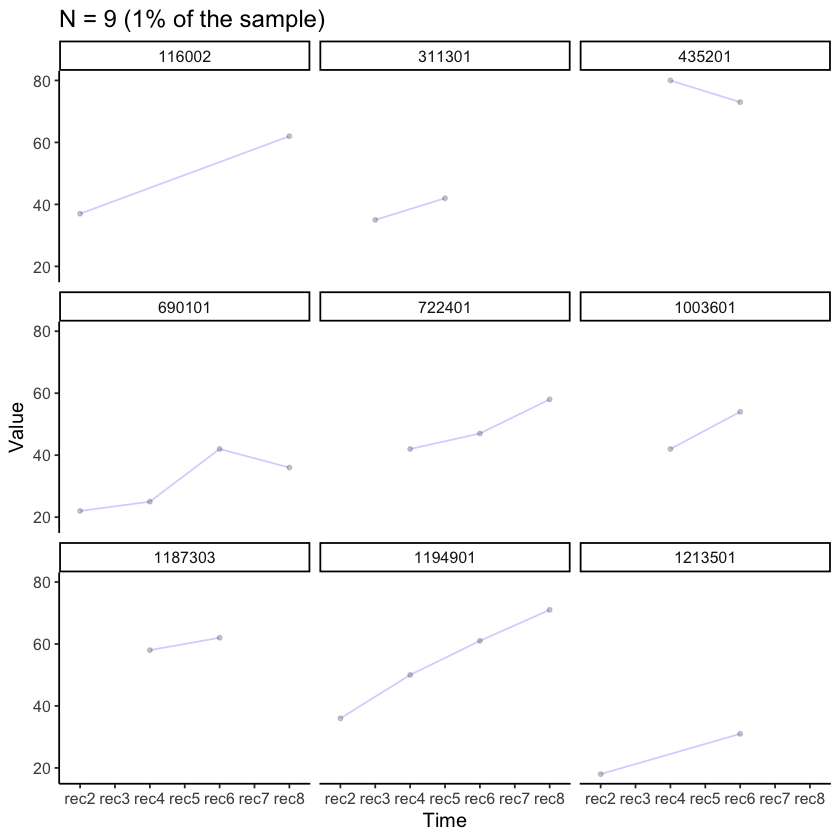

In [9]:
plot_trajectories(
    data = nlsy_multi_data,
    id_var = "id", 
    var_list = y_var_list,
    xlab = "Time", ylab = "Value",
    connect_missing = TRUE, 
    random_sample_frac = 0.01, 
    title_n = TRUE) +
  facet_wrap(~id)

Adattiamo ora quattro modelli di complessità crescente. Il primo modello ipotizza che i parametri di accoppiamento da matematica a lettura e da lettura a matematica siano pari a zero.  È il modello baseline. Il secondo modello ipotizza un effetto da lettura a matematica. Il terzo modello ipotizza un effetto da matematica a lettura. Il quarto modello ipotizza la presenza di entrambi i parametri di accoppiamento.

In [10]:
# baseline: no coupling
multi1_lavaan_results <- fit_bi_lcsm(
    data = nlsy_multi_data,
    var_x = x_var_list,
    var_y = y_var_list,
    model_x = list(alpha_constant = TRUE, beta = TRUE, phi = TRUE),
    model_y = list(alpha_constant = TRUE, beta = TRUE, phi = TRUE),
    coupling = list(xi_lag_xy = FALSE, xi_lag_yx = FALSE)
)

# reading affects change in math
multi2_lavaan_results <- fit_bi_lcsm(
    data = nlsy_multi_data,
    var_x = x_var_list,
    var_y = y_var_list,
    model_x = list(alpha_constant = TRUE, beta = TRUE, phi = TRUE),
    model_y = list(alpha_constant = TRUE, beta = TRUE, phi = TRUE),
    coupling = list(xi_lag_xy = TRUE, xi_lag_yx = FALSE)
)

# math affects change in reading
multi3_lavaan_results <- fit_bi_lcsm(
    data = nlsy_multi_data,
    var_x = x_var_list,
    var_y = y_var_list,
    model_x = list(alpha_constant = TRUE, beta = TRUE, phi = TRUE),
    model_y = list(alpha_constant = TRUE, beta = TRUE, phi = TRUE),
    coupling = list(xi_lag_xy = FALSE, xi_lag_yx = TRUE)
)

# both
multi4_lavaan_results <- fit_bi_lcsm(
    data = nlsy_multi_data,
    var_x = x_var_list,
    var_y = y_var_list,
    model_x = list(alpha_constant = TRUE, beta = TRUE, phi = TRUE),
    model_y = list(alpha_constant = TRUE, beta = TRUE, phi = TRUE),
    coupling = list(xi_lag_xy = TRUE, xi_lag_yx = TRUE)
)

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some cases are empty and will be ignored:
  741”


Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING:
    due to missing values, some pairwise combinations have less than
    10% coverage; use lavInspect(fit, "coverage") to investigate.”


Warning message in lav_mvnorm_missing_h1_estimate_moments(Y = X[[g]], wt = WT[[g]], :
“lavaan WARNING:
    Maximum number of iterations reached when computing the sample
    moments using EM; use the em.h1.iter.max= argument to increase the
    number of iterations”


Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some cases are empty and will be ignored:
  741”


Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING:
    due to missing values, some pairwise combinations have less than
    10% coverage; use lavInspect(fit, "coverage") to investigate.”


Warning message in lav_mvnorm_missing_h1_estimate_moments(Y = X[[g]], wt = WT[[g]], :
“lavaan WARNING:
    Maximum number of iterations reached when computing the sample
    moments using EM; use the em.h1.iter.max= argument to increase the
    number of iterations”


Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some cases are empty and will be ignored:
  741”


Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING:
    due to missing values, some pairwise combinations have less than
    10% coverage; use lavInspect(fit, "coverage") to investigate.”


Warning message in lav_mvnorm_missing_h1_estimate_moments(Y = X[[g]], wt = WT[[g]], :
“lavaan WARNING:
    Maximum number of iterations reached when computing the sample
    moments using EM; use the em.h1.iter.max= argument to increase the
    number of iterations”


Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some cases are empty and will be ignored:
  741”


Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING:
    due to missing values, some pairwise combinations have less than
    10% coverage; use lavInspect(fit, "coverage") to investigate.”


Warning message in lav_mvnorm_missing_h1_estimate_moments(Y = X[[g]], wt = WT[[g]], :
“lavaan WARNING:
    Maximum number of iterations reached when computing the sample
    moments using EM; use the em.h1.iter.max= argument to increase the
    number of iterations”


È ora possibile fare un confronto tra i vari modelli. Di seguito riportiamo la statistica BIC (valori minori sono preferibili). Dalle statistiche BIC emerge che il modello baseline è da preferire.

In [11]:
c(
    extract_fit(multi1_lavaan_results)$bic,
    extract_fit(multi2_lavaan_results)$bic,
    extract_fit(multi3_lavaan_results)$bic,
    extract_fit(multi4_lavaan_results)$bic
)

[1] 31518.91 31524.44 31525.71 31533.21

Eseguiamo ora i test del rapporto tra verosimiglianze tra i vari modelli.

In [12]:
lavTestLRT(multi1_lavaan_results, multi2_lavaan_results) |>
    print()


Scaled Chi-Squared Difference Test (method = “satorra.bentler.2001”)

lavaan NOTE:
    The “Chisq” column contains standard test statistics, not the
    robust test that should be reported per model. A robust difference
    test is a function of two standard (not robust) statistics.
 
                      Df   AIC   BIC  Chisq Chisq diff Df diff Pr(>Chisq)  
multi2_lavaan_results 97 31418 31524 179.14                                
multi1_lavaan_results 98 31417 31519 180.46     3.4354       1    0.06381 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [13]:
lavTestLRT(multi1_lavaan_results, multi3_lavaan_results) |>
    print()


Scaled Chi-Squared Difference Test (method = “satorra.bentler.2001”)

lavaan NOTE:
    The “Chisq” column contains standard test statistics, not the
    robust test that should be reported per model. A robust difference
    test is a function of two standard (not robust) statistics.
 
                      Df   AIC   BIC  Chisq Chisq diff Df diff Pr(>Chisq)
multi3_lavaan_results 97 31419 31526 180.42                              
multi1_lavaan_results 98 31417 31519 180.46    0.13804       1     0.7102


In [14]:
lavTestLRT(multi1_lavaan_results, multi4_lavaan_results) |>
    print()

Warning message in lavTestLRT(multi1_lavaan_results, multi4_lavaan_results):
“lavaan WARNING:
    Some restricted models fit better than less restricted models;
    either these models are not nested, or the less restricted model
    failed to reach a global optimum. Smallest difference =
    -0.623373603392196”



Scaled Chi-Squared Difference Test (method = “satorra.bentler.2001”)

lavaan NOTE:
    The “Chisq” column contains standard test statistics, not the
    robust test that should be reported per model. A robust difference
    test is a function of two standard (not robust) statistics.
 
                      Df   AIC   BIC  Chisq Chisq diff Df diff Pr(>Chisq)
multi4_lavaan_results 96 31422 31533 181.08                              
multi1_lavaan_results 98 31417 31519 180.46  -0.065354       2          1


Anche in questo caso non vi è evidenza che la presenza dei fattori di accoppiamento migliori l'adattamento del modello ai dati.

Per motivi didattici, però, proseguiamo l'analisi ipotizzando una presenza di entrambe le classi di parametri di accoppiamento (da comprensione nella lettura a matematica e viceversa).

In [15]:
multi4_lavaan_syntax <- fit_bi_lcsm(
    data = nlsy_multi_data,
    var_x = x_var_list,
    var_y = y_var_list,
    model_x = list(alpha_constant = TRUE, beta = TRUE, phi = TRUE),
    model_y = list(alpha_constant = TRUE, beta = TRUE, phi = TRUE),
    coupling = list(xi_lag_xy = TRUE, xi_lag_yx = TRUE),
    return_lavaan_syntax = TRUE
)

Di seguito riportiamo il path diagram del modello prescelto.

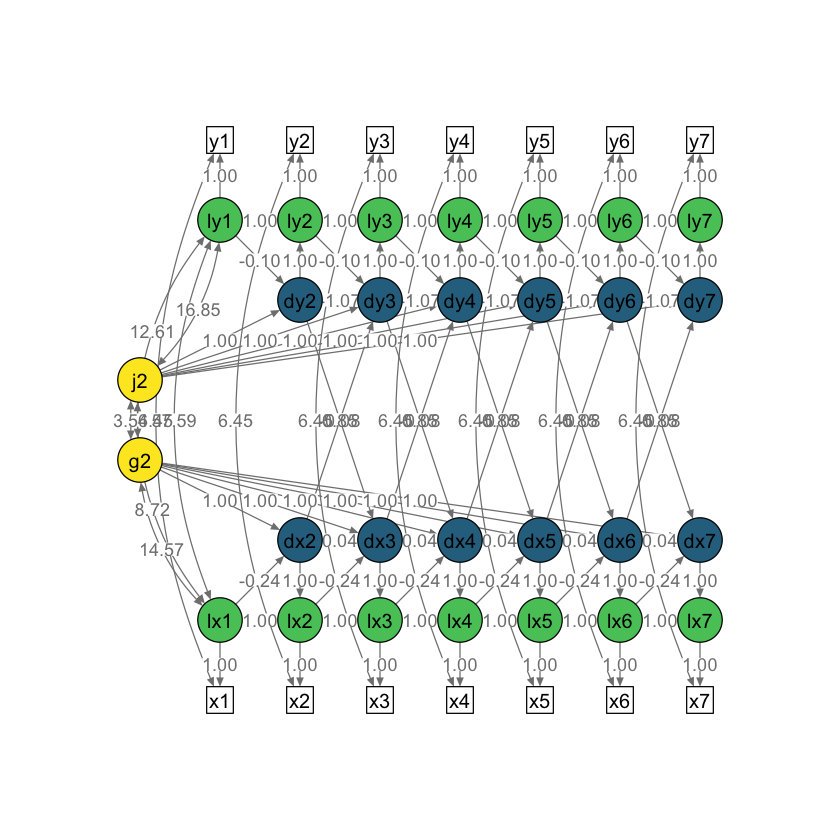

In [16]:
# Plot the results
plot_lcsm(
    lavaan_object = multi4_lavaan_results,
    lavaan_syntax = multi4_lavaan_syntax,
    edge.label.cex = .9,
    lcsm_colours = TRUE,
    lcsm = "bivariate"
)

Esaminiamo la bontà di adattamento.

In [17]:
extract_fit(multi4_lavaan_results)

model,chisq,npar,aic,bic,cfi,rmsea,srmr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,181.0836,23,31421.95,31533.21,0.9675202,0.03083751,0.1195777


Notiamo che le informazioni sull’adattamento del modello fornite da `lcsm` indicano che il modello di cambiamento duale si adatta bene ai dati con forti indici di adattamento globale (ad esempio, RMSEA inferiore a 0.05, CFI > 0.95).

Esaminiamo i parametri.

In [18]:
extract_param(multi4_lavaan_results)

label,estimate,std.error,statistic,p.value,std.lv,std.all,std.nox
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
gamma_lx1,32.35819868,0.5482380,59.02217843,0.000000e+00,3.88643028,3.88643028,3.88643028
sigma2_lx1,69.32133408,6.5429085,10.59488061,0.000000e+00,1.00000000,1.00000000,1.00000000
sigma2_ux,31.90529890,4.9765703,6.41110175,1.444718e-10,31.90529890,0.31518680,0.31518680
alpha_g2,15.41742212,7.7034105,2.00137617,4.535187e-02,6.62549284,6.62549284,6.62549284
sigma2_g2,5.41485895,5.2294946,1.03544593,3.004607e-01,1.00000000,1.00000000,1.00000000
sigma_g2lx1,14.56581960,11.7423402,1.24045287,2.148079e-01,0.75180965,0.75180965,0.75180965
beta_x,-0.23979369,0.2707290,-0.88573318,3.757613e-01,-1.28464649,-1.28464649,-1.28464649
phi_x,0.03905925,3.6535591,0.01069074,9.914702e-01,0.05208274,0.05208274,0.05208274
gamma_ly1,33.80333452,0.5199781,65.00914800,0.000000e+00,3.69882638,3.69882638,3.69882638


L'output completo è fornito qui di seguito.

In [19]:
out = summary(multi4_lavaan_results)
print(out)

lavaan 0.6.15 ended normally after 382 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        67
  Number of equality constraints                    44

                                                  Used       Total
  Number of observations                           932         933
  Number of missing patterns                        66            

Model Test User Model:
                                              Standard      Scaled
  Test Statistic                               181.084     236.332
  Degrees of freedom                                96          96
  P-value (Chi-square)                           0.000       0.000
  Scaling correction factor                                  0.766
    Yuan-Bentler correction (Mplus variant)                       

Parameter Estimates:

  Standard errors                             Sandwich
  Information bread    

### Interpretazione

Le stime dei parametri di questo modello descrivono le traiettorie medie e individuali per la matematica e la comprensione della lettura, nonché le loro associazioni nel tempo. Le traiettorie medie per la matematica e la comprensione della lettura iniziano rispettivamente a 32.27 e 33.99. Da lì, le traiettorie medie sono descritte dalle rispettive equazioni di cambiamento.

Per l'equazione di cambiamento della matematica, la media della componente di cambiamento costante è 15.82 e indica l'aumento costante ogni anno. La media della componente di cambiamento proporzionale è -0.27, il che indica un effetto limitativo (il coefficiente è negativo) sul cambiamento in matematica dovuto ai punteggi precedenti di matematica. Il modello assume l'assenza di un effetto di accoppiamento (0).

$$
dm_{t1} = 15.82 - 0.27 \cdot lm_{t-li} + 0
$$

Per l'equazione di cambiamento della comprensione nella lettura, la media della componente di cambiamento costante è 12.59 e indica l'aumento costante ogni anno. La media della componente di cambiamento proporzionale è -0.15, il che indica un effetto limitativo (il coefficiente è negativo) sul cambiamento nella comprensione nella lettura dovuto ai punteggi precedenti di comprensione nella lettura. Il modello assume l'assenza di un effetto di accoppiamento (0).

$$
dc_{t1} = 12.59 - 0.15 \cdot lc_{t-li} + 0
$$

Poniamoci ora il problema di creare una figura che riporta le traiettorie individuali previste dal modello bivariato. Per creare la figura dobbiamo innanzitutto recuperare la sintassi lavaan del modello duale.

Otteniamo i punteggi fattoriali.

In [20]:
nlsy_predicted <- cbind(
    nlsy_multi_data$id, 
    as.data.frame(lavPredict(multi4_lavaan_results, type = "yhat"))
)
names(nlsy_predicted)[1] <- "id"
#looking at data
head(nlsy_predicted)

,id,x1,x2,x3,x4,x5,x6,x7,y1,y2,y3,y4,y5,y6,y7
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,201,32.31401,40.44936,46.31082,50.86151,54.27420,56.95342,58.93260,31.11161,38.91511,44.48303,49.99710,53.93651,58.22823,61.11388
2,303,23.63156,30.26730,35.06621,38.77146,41.57058,43.74548,45.37455,23.97613,30.12302,34.70117,38.97384,42.24332,45.51189,47.94291
3,2702,47.27434,55.27396,61.04467,65.51684,68.87868,71.50909,73.46104,37.21375,44.80124,50.29065,55.62423,59.52003,63.64887,66.51678
4,4303,35.87434,43.92796,49.76704,54.25856,57.66855,60.29957,62.28886,30.36955,37.65013,43.23665,48.23692,52.25133,56.02712,59.04127
5,5002,33.62331,42.22928,48.32505,53.17758,56.69703,59.59230,61.59989,38.52148,48.05199,53.72810,60.87664,64.71510,70.61191,73.21252
6,5005,36.89419,44.68081,50.09167,54.52072,57.61462,60.29518,62.02572,46.35794,56.25401,61.17627,68.95694,72.10181,78.79119,80.69319


Convertiamo i dati in formato long.

In [21]:
predicted_long <- reshape(
       data = nlsy_predicted,
       varying = c(
              "x1", "x2", "x3", "x4", "x5", "x6", "x7",
              "y1", "y2", "y3", "y4", "y5", "y6", "y7"
       ),
       timevar = c("grade"),
       idvar = c("id"),
       direction = "long", sep = ""
)

#sorting for easy viewing
#reorder by id and day
predicted_long <- predicted_long[order(predicted_long$id,predicted_long$grade), ]

#looking at the long data
head(predicted_long, 14)

,id,grade,x,y
,<int>,<dbl>,<dbl>,<dbl>
201.1,201,1,32.31401,31.11161
201.2,201,2,40.44936,38.91511
201.3,201,3,46.31082,44.48303
201.4,201,4,50.86151,49.99710
201.5,201,5,54.27420,53.93651
201.6,201,6,56.95342,58.22823
201.7,201,7,58.93260,61.11388
303.1,303,1,23.63156,23.97613
303.2,303,2,30.26730,30.12302


Creiamo un grafico del cambiamento intra-individuale per la matematica.

Warning message:
“Removed 939 rows containing missing values (`geom_line()`).”


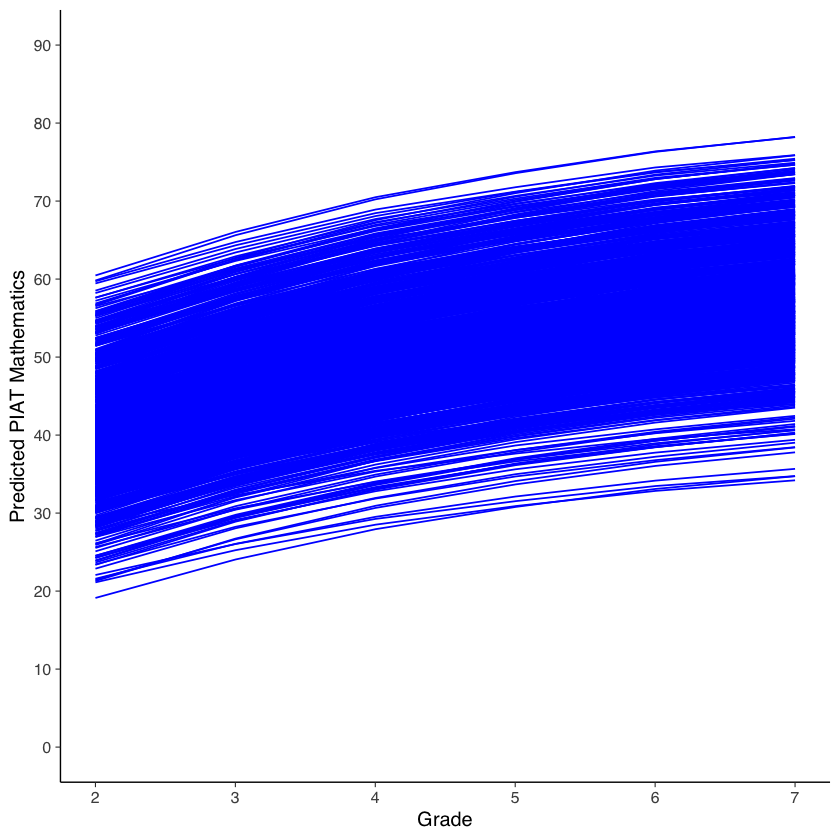

In [22]:
ggplot(data = predicted_long, aes(x = grade, y = x, group = id)) +
  #geom_point(color="blue") + 
  geom_line(color="blue") +
  xlab("Grade") + 
  ylab("Predicted PIAT Mathematics") + 
  scale_x_continuous(limits=c(2,7), breaks=seq(2,8,by=1)) +
  scale_y_continuous(limits=c(0,90), breaks=seq(0,90,by=10))

Creiamo un grafico del cambiamento intra-individuale per la comprensione nella lettura.

Warning message:
“Removed 948 rows containing missing values (`geom_line()`).”


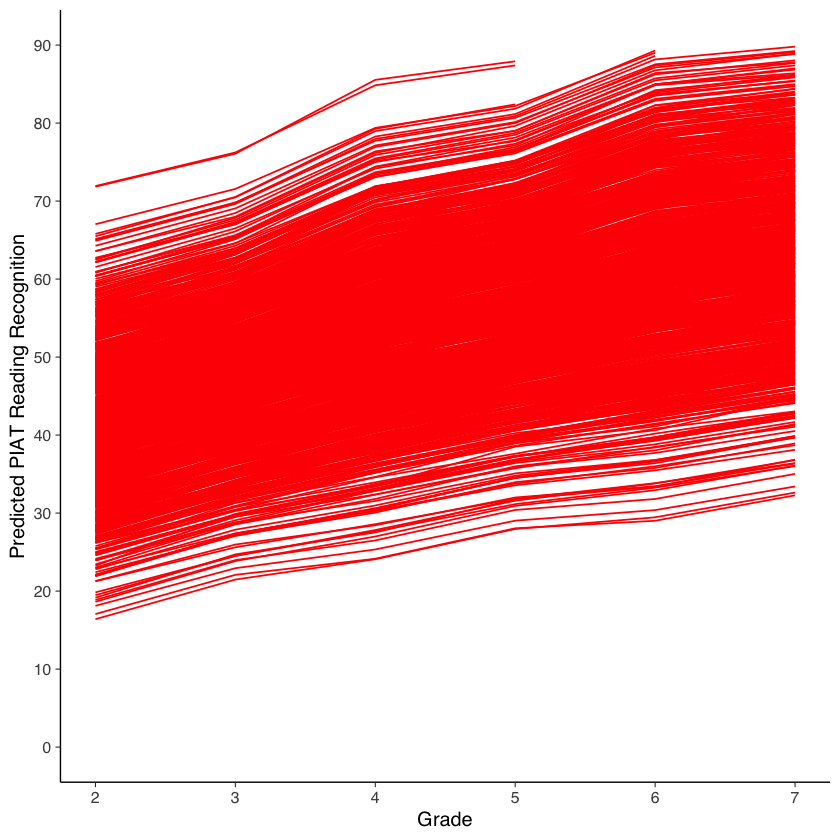

In [23]:
ggplot(data = predicted_long, aes(x = grade, y = y, group = id)) +
  #geom_point(color="red") + 
  geom_line(color="red") +
  xlab("Grade") + 
  ylab("Predicted PIAT Reading Recognition") +
  scale_x_continuous(limits=c(2,7), breaks=seq(2,8,by=1)) +
  scale_y_continuous(limits=c(0,90), breaks=seq(0,90,by=10))

Esaminiamo gli effetti combinati dei cambiamenti nelle due variabili.

In [24]:
# reshaping wide to long
data_long <- reshape(
       data = nlsy_multi_data,
       varying = c(
              "math2", "math3", "math4", "math5", "math6", "math7", "math8",
              "rec2", "rec3", "rec4", "rec5", "rec6", "rec7", "rec8"
       ),
       timevar = c("grade"),
       idvar = c("id"),
       direction = "long", sep = ""
)

#sorting for easy viewing
#reorder by id and day
data_long <- data_long[order(data_long$id,data_long$grade), ]

#looking at the long data
head(data_long, 8)

,id,grade,math,rec
,<int>,<dbl>,<int>,<int>
201.2,201,2,NA,NA
201.3,201,3,38,35
201.4,201,4,NA,NA
201.5,201,5,55,52
201.6,201,6,NA,NA
201.7,201,7,NA,NA
201.8,201,8,NA,NA
303.2,303,2,26,26


Warning message:
“Removed 4317 rows containing non-finite values (`stat_ellipse()`).”


Warning message:
“Removed 4317 rows containing missing values (`geom_point()`).”


Warning message:
“Removed 1 rows containing missing values (`geom_segment()`).”


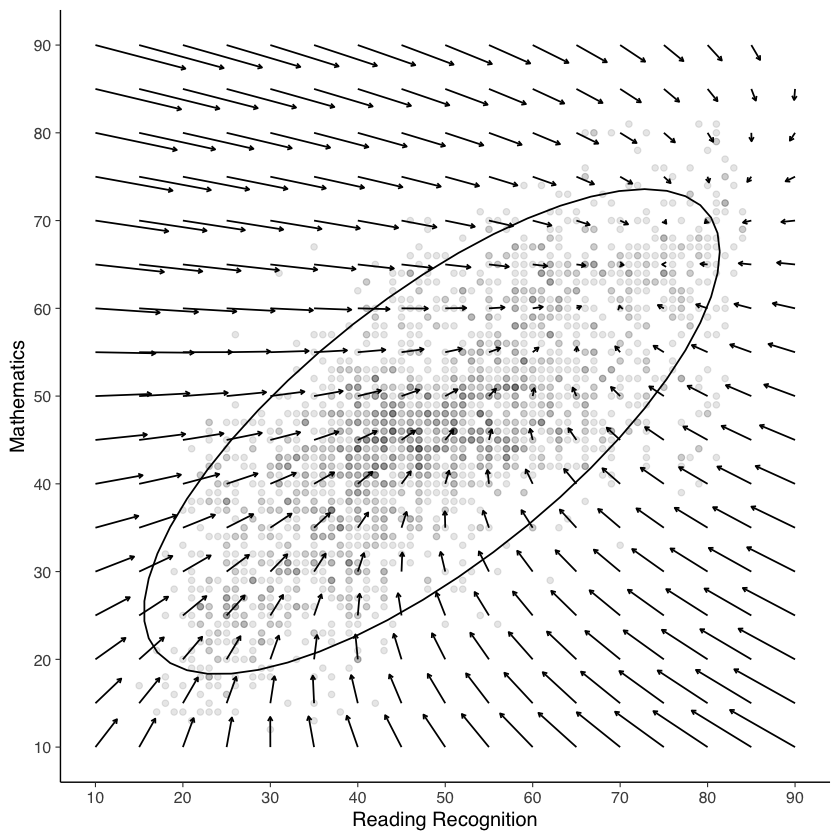

In [25]:
#creating a grid of starting values 
df <- expand.grid(math=seq(10, 90, 5), rec=seq(10, 90, 5))

#calculating change scores for each starting value 
#changes in math based on output from model
df$dm <- with(df, 15.09 - 0.293*math + 0.053*rec)
#changes in reading based on output from model
df$dr <- with(df, 10.89 - 0.495*rec + 0.391*math)

#Plotting vector field with .25 unit time change 
ggplot(data = df, aes(x = x, y = y)) +
  geom_point(data=data_long, aes(x=rec, y=math), alpha=.1) + 
  stat_ellipse(data=data_long, aes(x=rec, y=math)) +
  geom_segment(aes(x = rec, y = math, xend = rec+.25*dr, yend = math+.25*dm), arrow = arrow(length = unit(0.1, "cm"))) +
  xlab("Reading Recognition") + 
  ylab("Mathematics") +
  scale_x_continuous(limits=c(10,90), breaks=seq(10,90,by=10)) +
  scale_y_continuous(limits=c(10,90), breaks=seq(10,90,by=10))

Il grafico rappresenta l’evoluzione delle variabili nel tempo. Le frecce del campo vettoriale indicano le variazioni previste nello spazio bivariato per un intervallo di tempo di 0.25 unità. Si osserva che i dati si concentrano principalmente all’interno dell’ellisse di confidenza al 95%. Al di fuori di questa area, i vettori direzionali sono interpolati sulla base delle osservazioni e dei modelli derivati dai dati effettivi (cioè all’interno dell’ellisse). Pertanto, è importante evitare di sovrainterpretare le dinamiche al di fuori dell’ellisse.

La regione dello spazio vettoriale in cui i vettori tendono a zero indica le combinazioni di valori delle due variabili per cui non si prevedono ulteriori cambiamenti. L’aspetto più interessante del grafico non è tanto il risultato finale del processo, quanto la descrizione della forza e della direzione del cambiamento per ogni combinazione di valori delle due variabili considerate.
